## Define preprocessing constants

In [13]:
INPUT_TRAINING_FILE = "../data/original/training_dataset.csv"
INPUT_EVALUATION_FILE = "../data/original/evaluation_dataset.csv"
OUTPUT_TRAINING_FILE = "../data/preprocessed/difference_preprocessed_training_dataset.csv"
OUTPUT_EVALUATION_FILE = "../data/preprocessed/difference_preprocessed_evaluation_dataset.csv"

MIN_DIFFERENCE_TRESHOLD = 0.5
MAX_DIFFERENCE_TRESHOLD = 10000

## Let's start by loading necessary useful libraries

In [14]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from numpy import *

from sklearn.preprocessing import MinMaxScaler

## Next up original data will be loaded and presented in normalized form

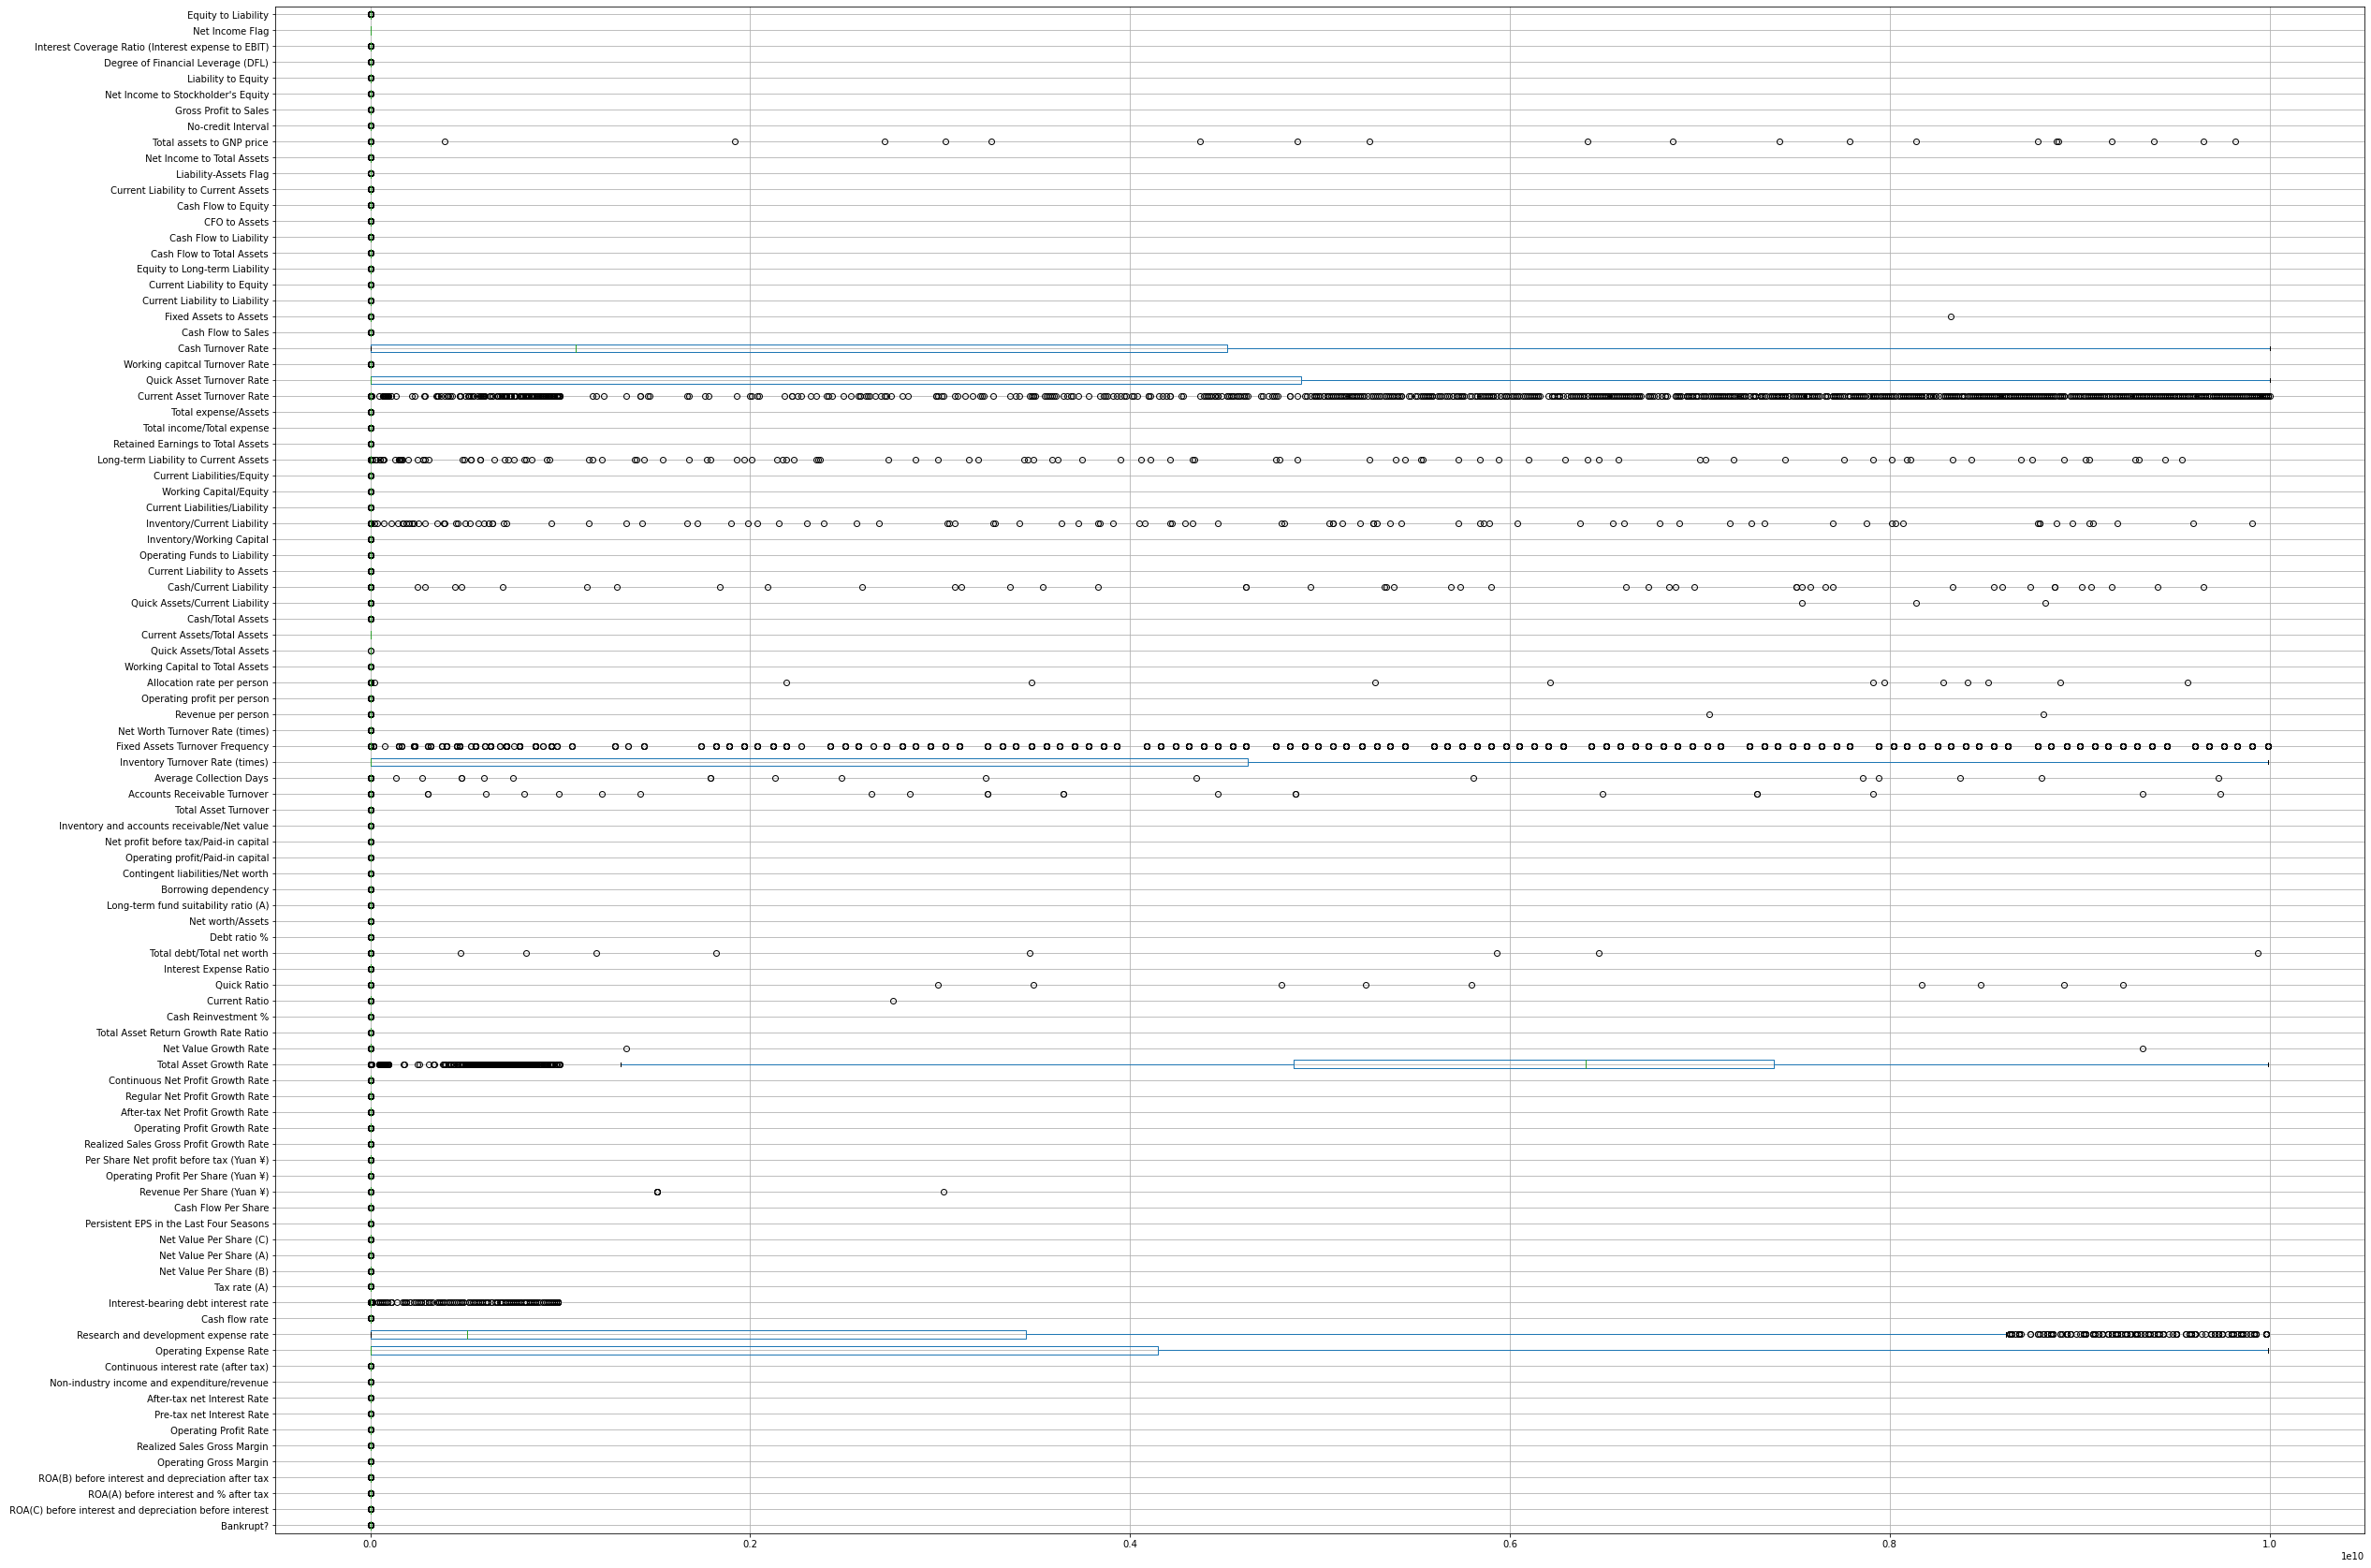

In [15]:
# Load the dataset and combine it, memorize which row is boundary
training_dataset = pd.read_csv(INPUT_TRAINING_FILE)
dataset_boundary = len(training_dataset.index)
evaluation_dataset = pd.read_csv(INPUT_EVALUATION_FILE)
dataset = pd.concat([training_dataset, evaluation_dataset], axis=0)

# Calculate key statistics from original dataset
original_row_amount = len(dataset.index)
original_features_amount = len(dataset.columns)

# Plot boxplot of the dataset
plt.rcParams["figure.figsize"] = (40,30)
dataset.boxplot(vert=False)
plt.show()

## Preprocess the dataset

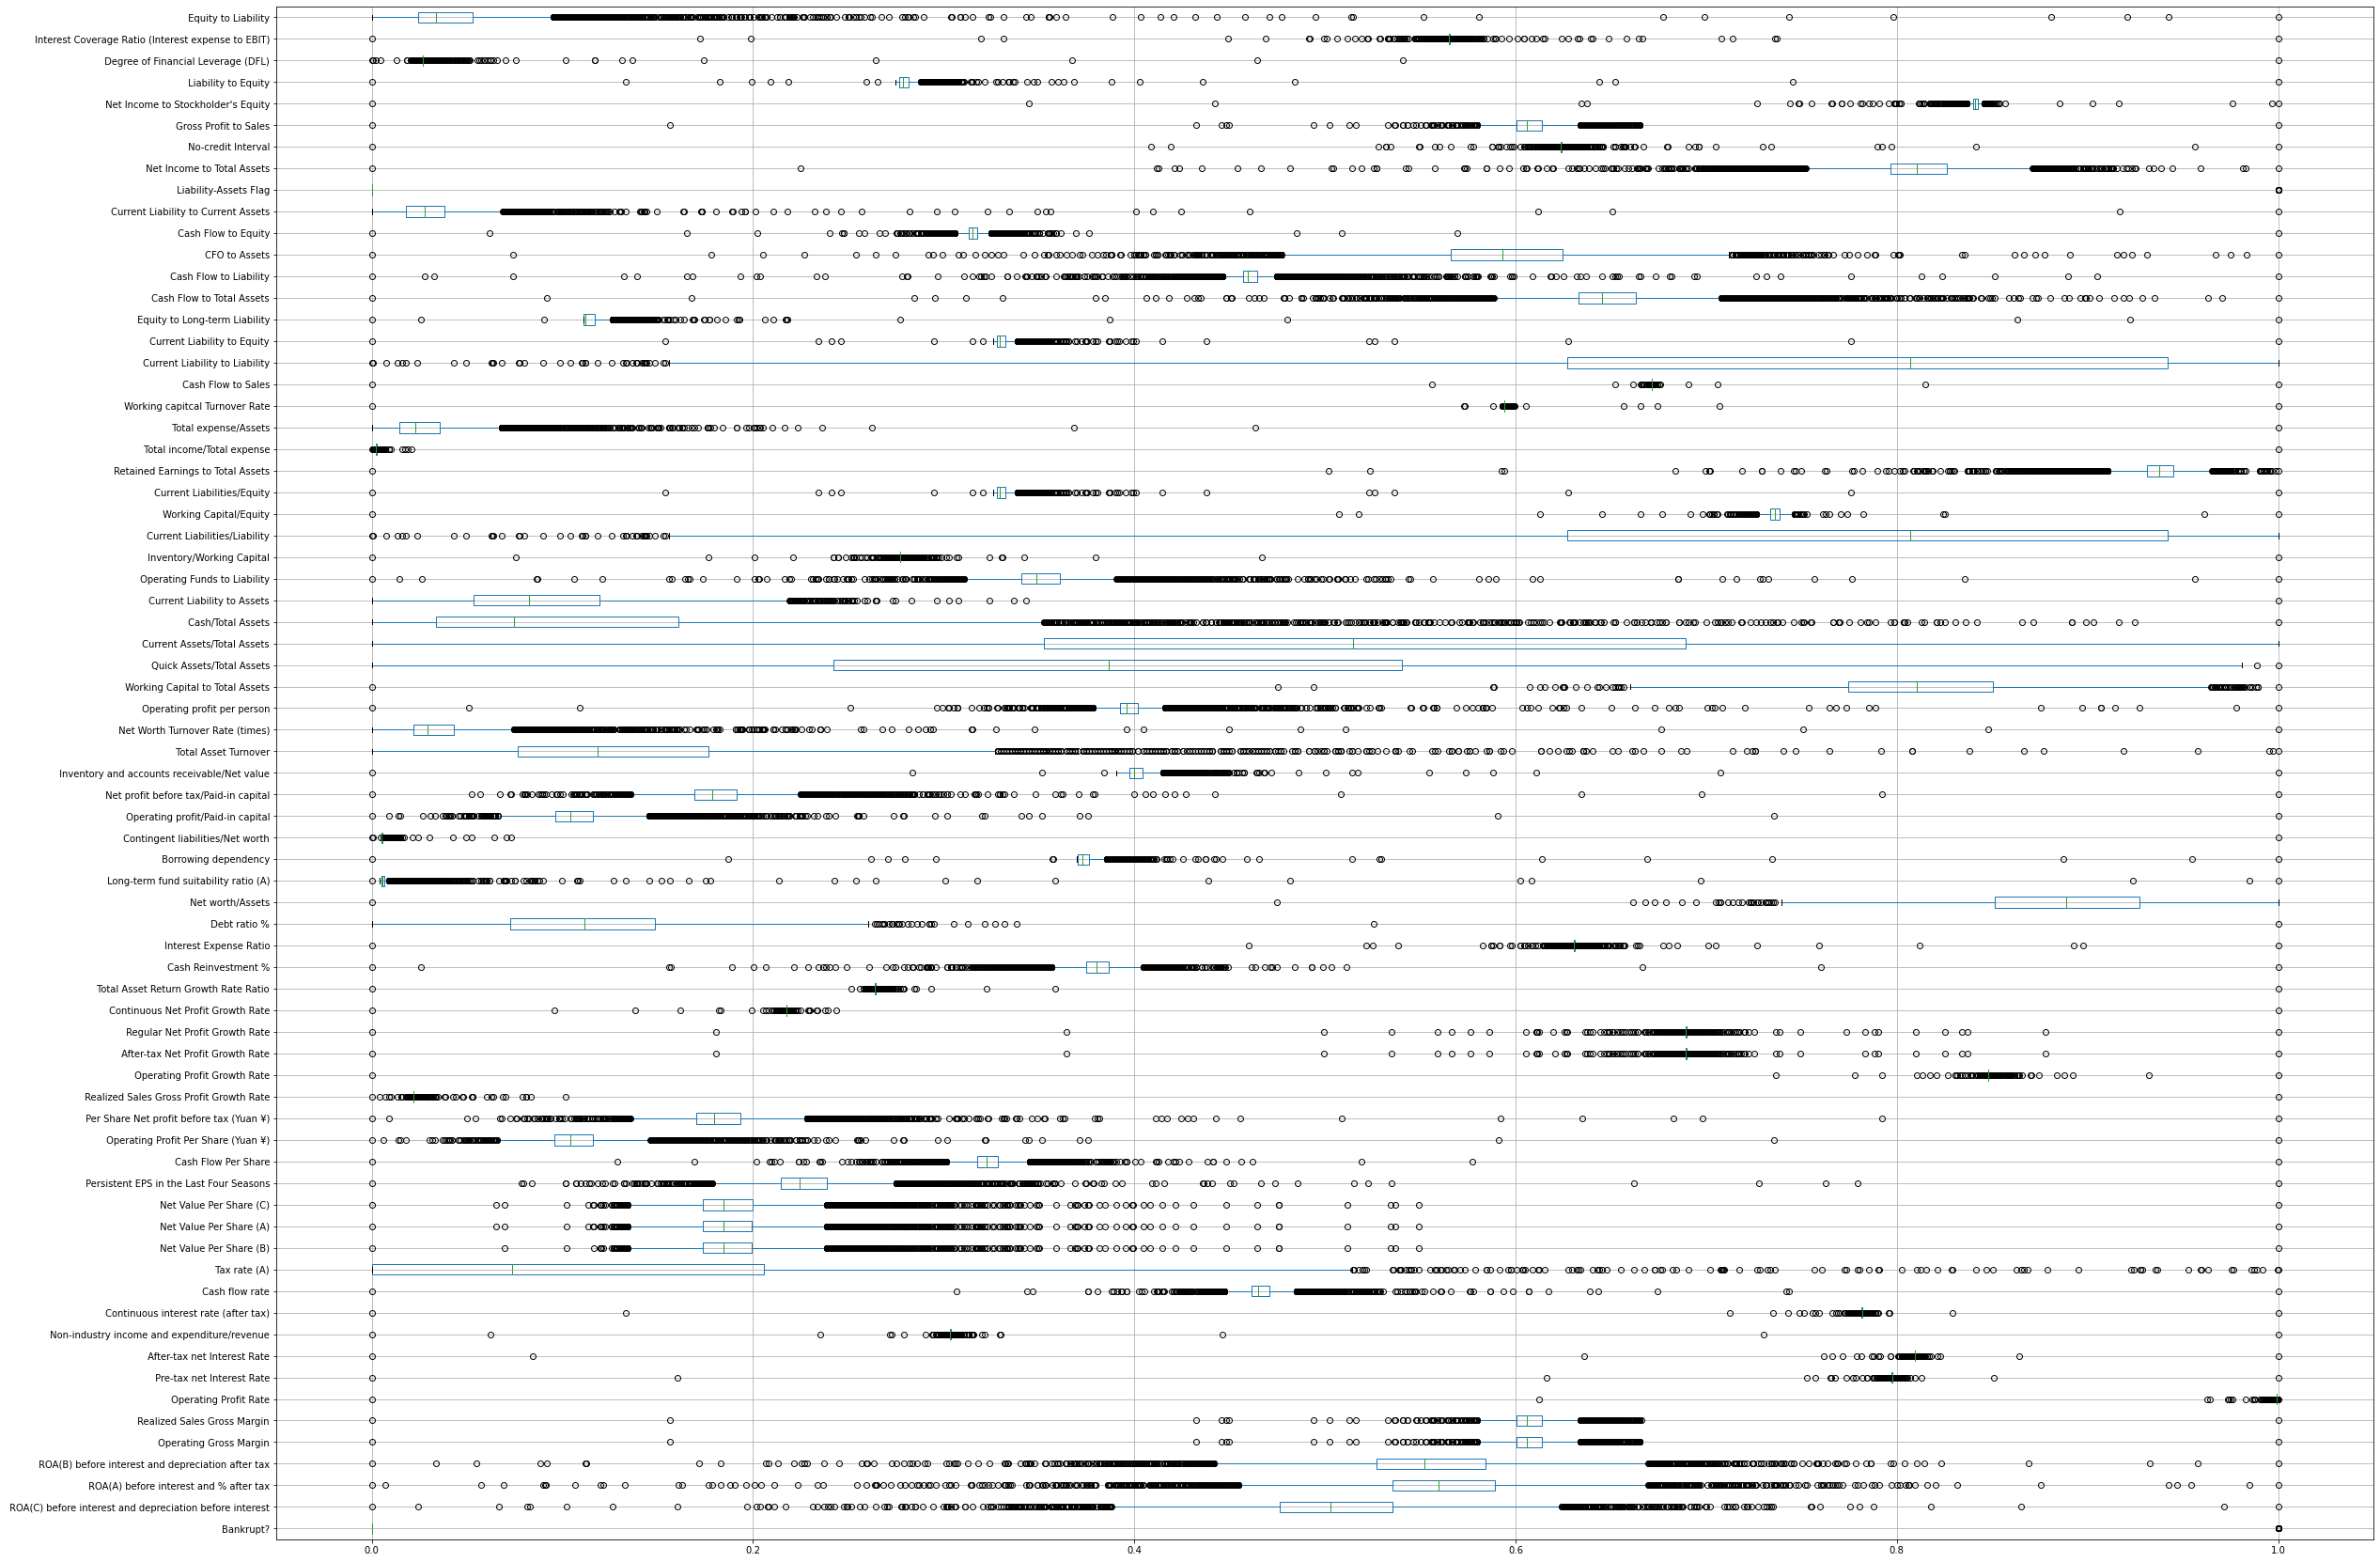

In [16]:
# Remove columns that have very large differences
columns_to_be_removed = {}
for column in dataset.columns:
    difference = dataset[column].max() - dataset[column].min()
    if difference < MIN_DIFFERENCE_TRESHOLD or difference > MAX_DIFFERENCE_TRESHOLD:
        columns_to_be_removed[column] = True

# Remove marked columns except Bankrupt? label column
if "Bankrupt?" in columns_to_be_removed:
    del columns_to_be_removed["Bankrupt?"]
dataset = dataset.drop(columns=columns_to_be_removed.keys())

# Show new results
dataset.boxplot(vert=False)
plt.show()

## Rebalance the data to get it ready for machine learning

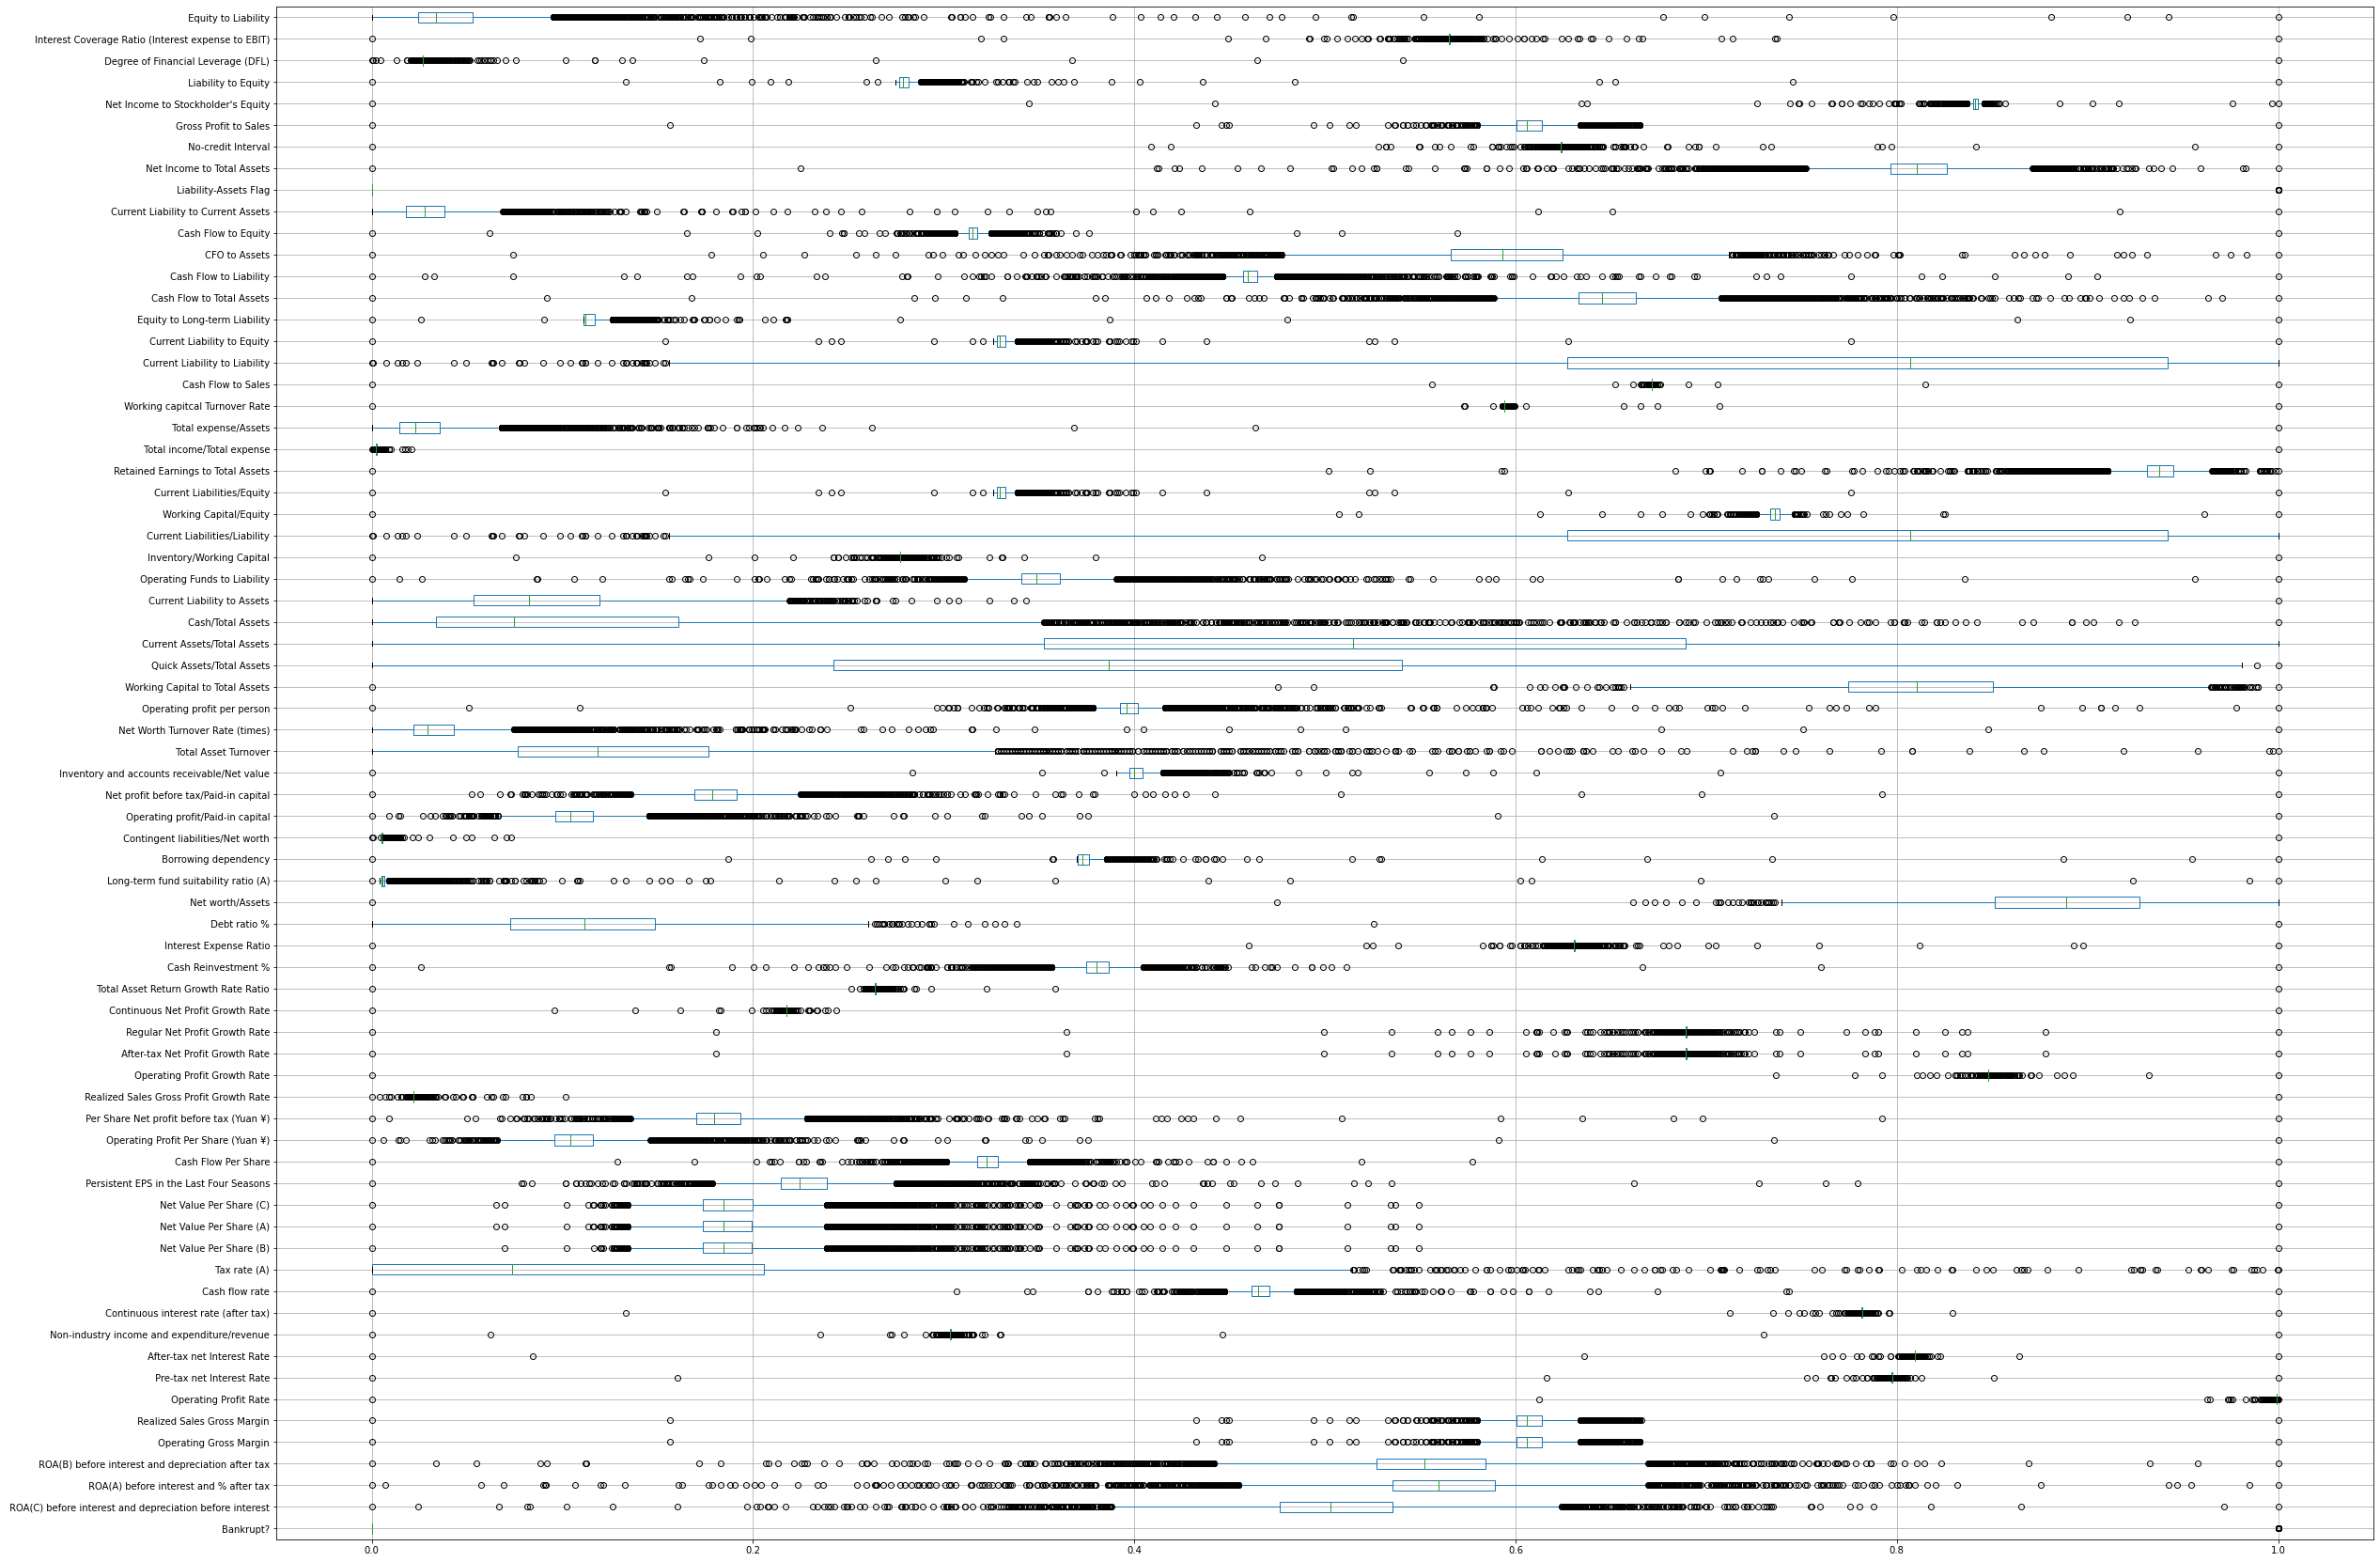

Data entries / rows left: 100.0%
Features / columns left: 73.9583%


In [17]:
# Rebalance the data using standard scaler and min max scaler
min_max_scaler = MinMaxScaler()
dataset = pd.DataFrame(min_max_scaler.fit_transform(dataset), columns=dataset.columns)

# Resharp the label field
dataset.loc[dataset["Bankrupt?"] > 0.5, "Bankrupt?"] = 1
dataset.loc[dataset["Bankrupt?"] < 0.5, "Bankrupt?"] = 0

# Show final results
dataset.boxplot(vert=False)
plt.show()

# Show how many rows we still have left
print(f"Data entries / rows left: {round(len(dataset.index) / original_row_amount * 100, 4)}%")

# Show how many features we still have left
print(f"Features / columns left: {round(len(dataset.columns) / original_features_amount * 100, 4)}%")

## Save the preprocessed dataset

In [18]:
# Separate dataset back to original splits and save it
training_dataset = dataset.iloc[:dataset_boundary,:]
evaluation_dataset = dataset.iloc[dataset_boundary:,:]

training_dataset.to_csv(OUTPUT_TRAINING_FILE, index=False, quoting=csv.QUOTE_ALL)
evaluation_dataset.to_csv(OUTPUT_EVALUATION_FILE, index=False, quoting=csv.QUOTE_ALL)